In [1]:
import train_sb3 as train
import numpy as np
from hem.env.utils import Renderer
import evaluate_tools as et

from hem.HEM_v0 import parallel_env, sa_env, gym_env
from hem.HEM_v1 import sa_stack_env
from stable_baselines3 import SAC, PPO, DDPG

In [2]:
env_cl = sa_env
model = SAC

experiment_name = input('Experiment name: ')
checkpoint_path_dict = train.checkpoint_path(experiment_name, 0, 0)

model = et.load_best_model(checkpoint_path_dict, sb3_model=model)
env = et.load_test_env(checkpoint_path_dict, env_cl=env_cl, num_episodes_in_one_test=4, train_mode=False,
                       noise_strength=0)
train_env_kwargs = np.load(checkpoint_path_dict['env_set_path'], allow_pickle=True)['train_env_kwargs']
print(env.metadata)

Load best model from ./checkpoint/sa_stack_sac_bess_fe_no_base_20250323-223618/iteration_0/sample_0
Make env: mode: test, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
{'name': 'RawSAEnv_for_HEM', 'black_death': True, 'multi_agent': True, 'is_parallelizable': True}


In [3]:
print(model.policy)

SACPolicy(
  (actor): Actor(
    (features_extractor): FeaturesExtractor(
      (features_extractor): Sequential(
        (0): LayerNorm((170,), eps=1e-05, elementwise_affine=True)
        (1): Linear(in_features=170, out_features=256, bias=True)
        (2): ReLU()
      )
    )
    (latent_pi): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=512, bias=True)
      (3): ReLU()
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): ReLU()
      (6): Linear(in_features=128, out_features=32, bias=True)
      (7): ReLU()
      (8): Linear(in_features=32, out_features=128, bias=True)
      (9): ReLU()
      (10): Linear(in_features=128, out_features=512, bias=True)
      (11): ReLU()
      (12): Linear(in_features=512, out_features=256, bias=True)
      (13): ReLU()
    )
    (mu): Linear(in_features=256, out_features=6, bias=True)
    (log_std): Linear(in_features=256, out_feat

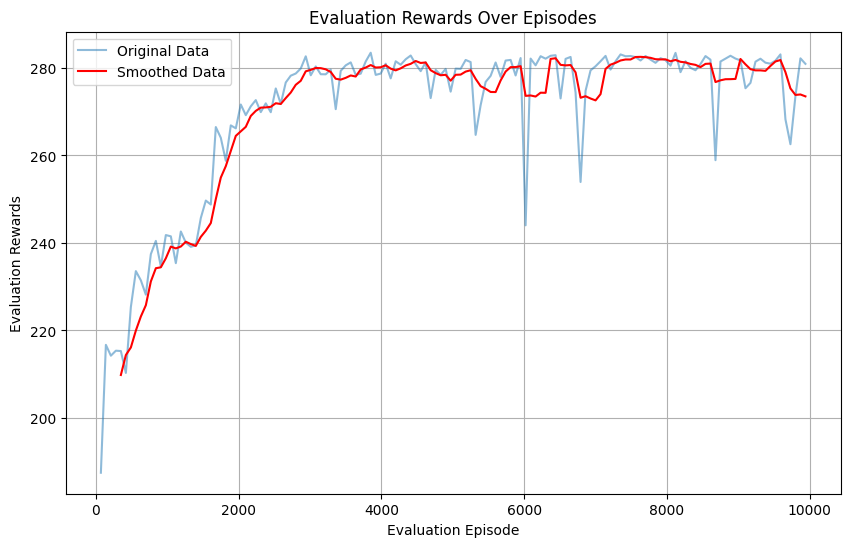

In [4]:
et.plot_log(checkpoint_path_dict['log_path'] + '/evaluations.npz', checkpoint_path_dict['env_set_path'])

Episode Time: (0, 1151)
KPIs:
electrical_consumption_sum: 2.22
electrical_cost_sum: -2.28
discomfort_proportion: 0.93
discomfort_cold_proportion: 0.90
discomfort_hot_proportion: 0.03
BESS_electrical_consumption_contribution: 2.22 / 37.45, 0.94
BESS_electrical_cost_contribution: -2.28 / 160.13, 1.01
AC_control: 1152 / 1152, 1.00
BESS_control: 1113 / 1152, 0.97
washer_control: 1152 / 1152, 1.00
AC_reward: 0.00
BESS_reward: 889.26
washer_reward: 0.00


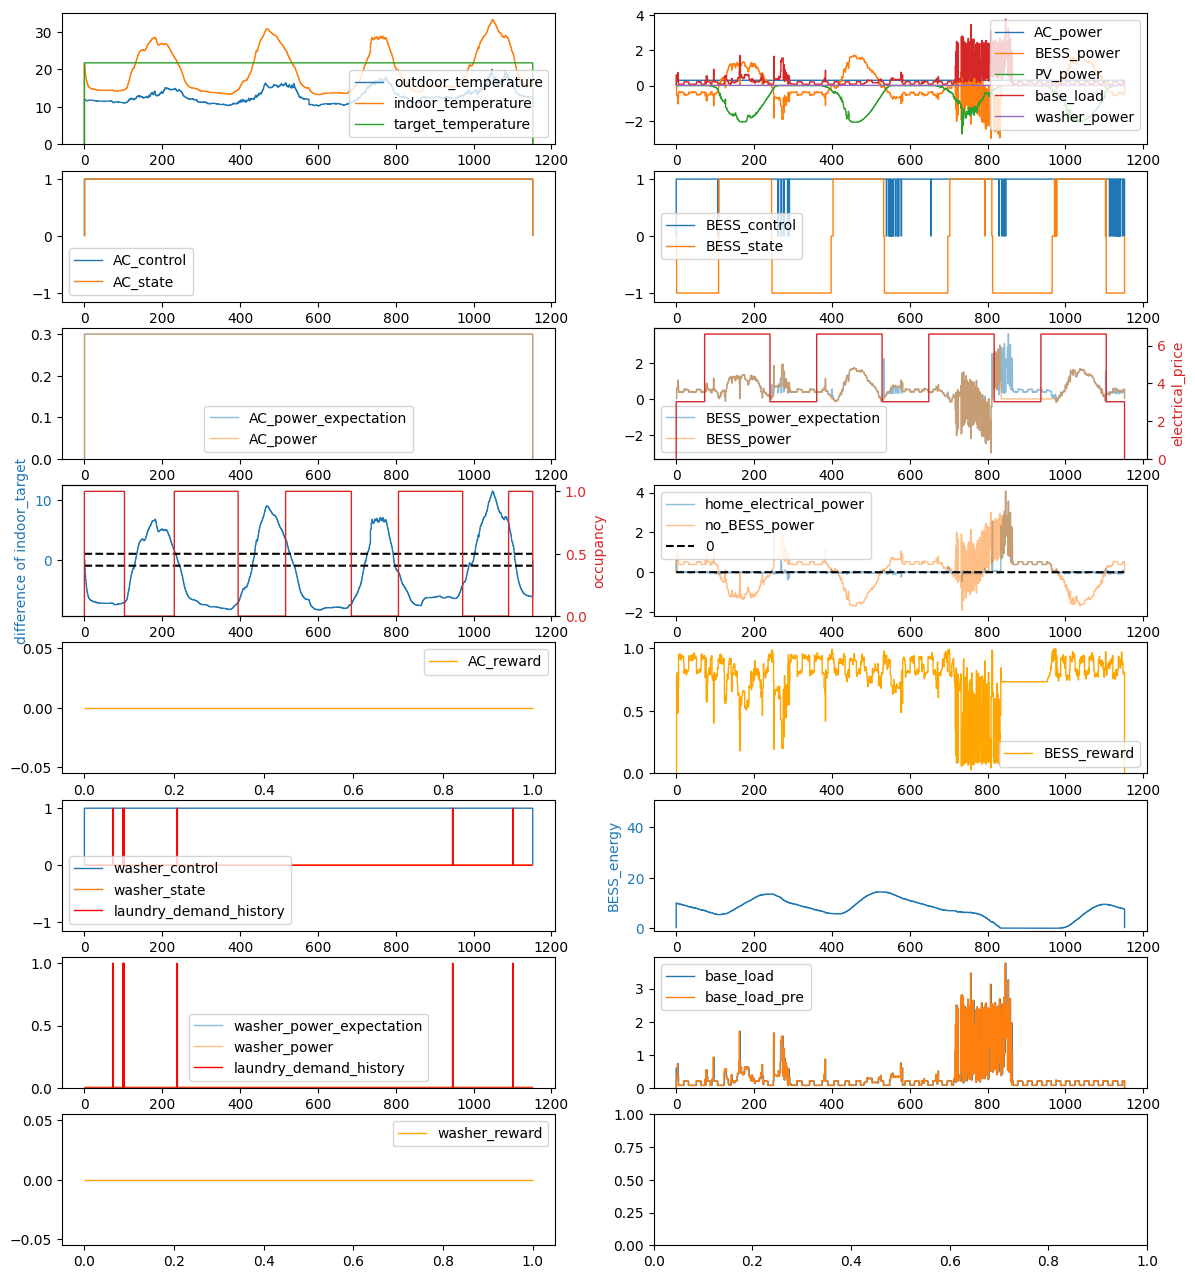

observation_shape: (1, 170), action_shape: (1, 6)


In [5]:
num_episodes = 1
if env.metadata['multi_agent']:
    renderer = Renderer(render_mode='episode', env=env.par_env.unwrapped)
    et.pz_simulation_process(env, renderer, model, num_episodes=num_episodes)
else:
    renderer = Renderer(render_mode='episode', env=env.envs[0])
    et.gym_simulation_process(env, renderer, model, num_episodes=num_episodes)